In [14]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
plot.set_style()

import matplotlib.lines as mlines
import knunu_utils

from bayesian_pyhf import plotting
import arviz as az
import corner

In [2]:
null = knunu_utils.null_pred()
alt = knunu_utils.alt_pred()

In [3]:
model, alt_yields = modifier.load('knunu_model.json', alt.distribution, null.distribution, return_data=True)

## Load and plot samples

In [4]:
post_data = az.from_json( '../samples_multiply/knunu_large_post_data.json')
post_pred = az.from_json( '../samples_multiply/knunu_large_post_pred.json')
prior_pred = az.from_json('../samples_multiply/knunu_large_prior_pred.json')

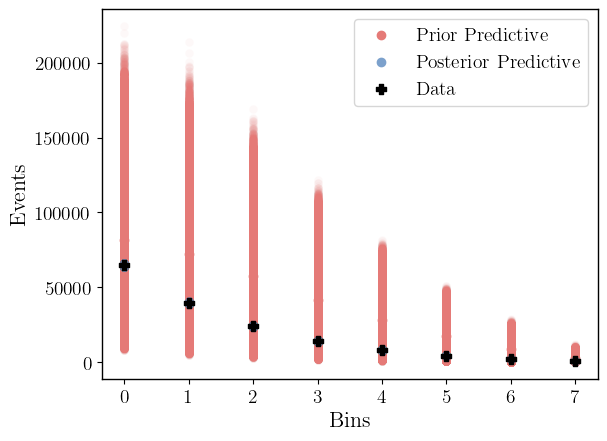

In [5]:
plotting.prior_posterior_predictives(model=model, data=alt_yields, post_pred=post_pred, prior_pred=prior_pred)
plt.show()

array([<Axes: title={'center': '94.0% HDI'}>,
       <Axes: title={'center': 'ess'}>, <Axes: title={'center': 'r_hat'}>],
      dtype=object)

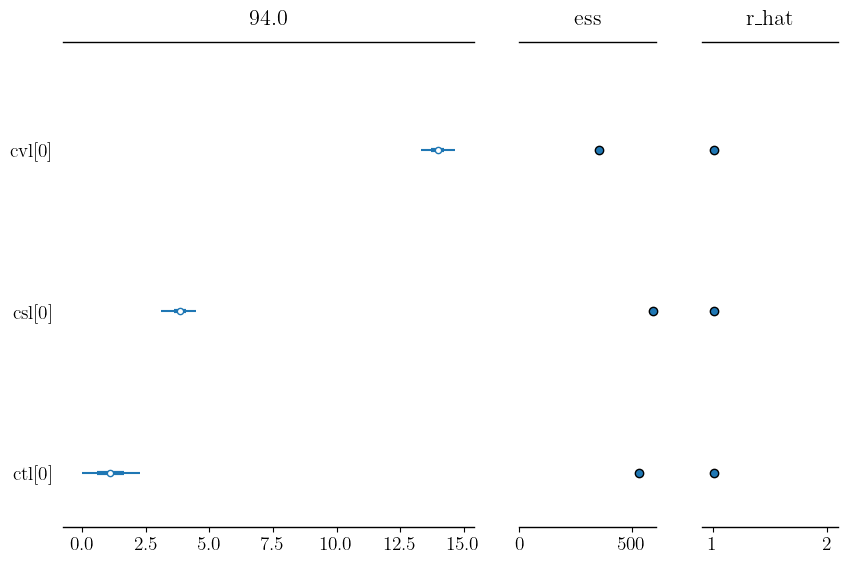

In [6]:
az.plot_forest(post_data, var_names=['cvl', 'csl', 'ctl'], combined=True, ess=True, r_hat=True)

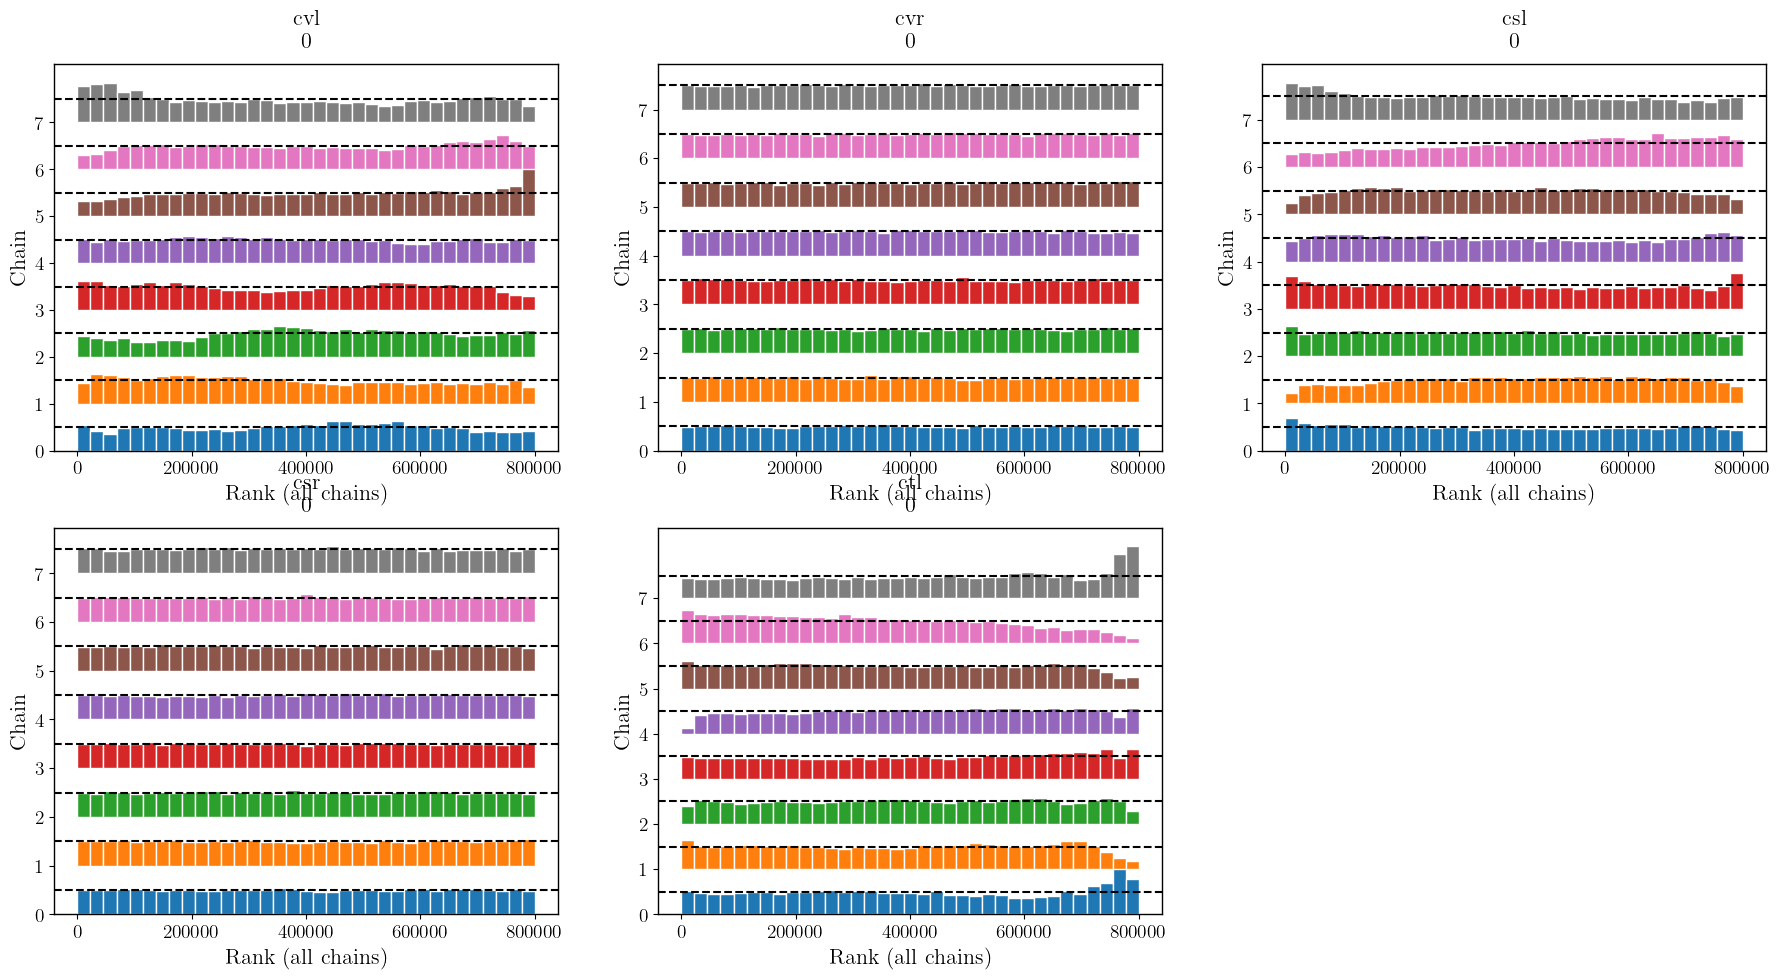

In [7]:
az.plot_rank(post_data, var_names=['cvl', 'cvr', 'csl', 'csr', 'ctl']);


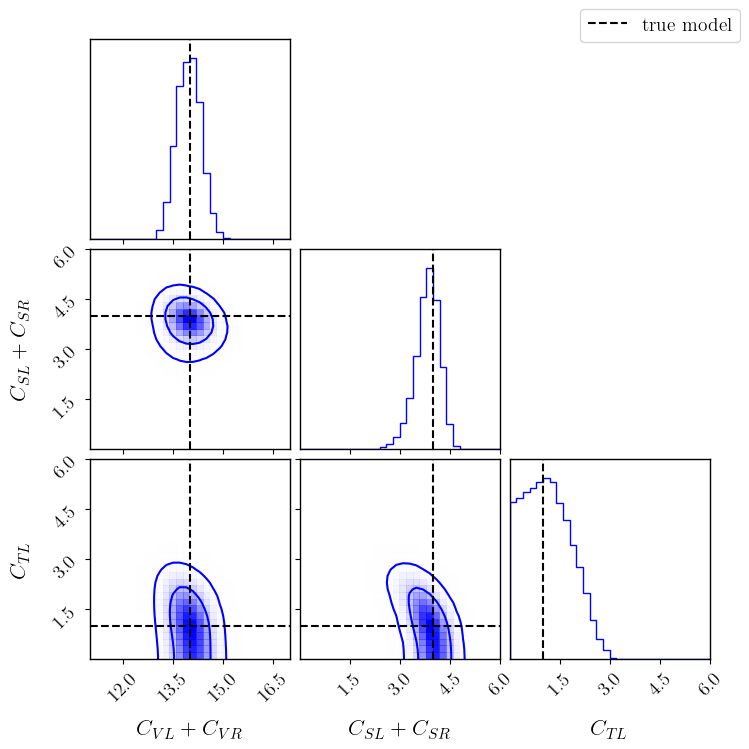

In [8]:
cv = r'$C_{VL} + C_{VR}$'
cs = r'$C_{SL} + C_{SR}$'
ct = r'$C_{TL}$'
labels = [cv, cs, ct]

file = 'results/knunu_samples.pdf'


fig = corner.corner(post_data.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=30, 
                    levels=(0.68, 0.95), 
                    # quantiles=(0.025, 0.975), 
                    range = [(11, 17), (0,6), (0,6)],
                    smooth=1.5,
                    labels=labels,
                    color='blue',
                    plot_datapoints=False
                    );

truewcs = [14, 4, 1]
corner.overplot_lines(fig, truewcs, color='k', label='true model', linestyle='--')

handles, labs = fig.axes[0].get_legend_handles_labels()
by_label = dict(zip(labs, handles))
fig.legend(by_label.values(), by_label.keys())

# plt.savefig(file)
plt.show()

## Compare large / small


In [16]:
post_data_small = az.from_json( '../samples_multiply/knunu_small_post_data.json')
post_data_large = az.from_json( '../samples_multiply/knunu_large_post_data.json')

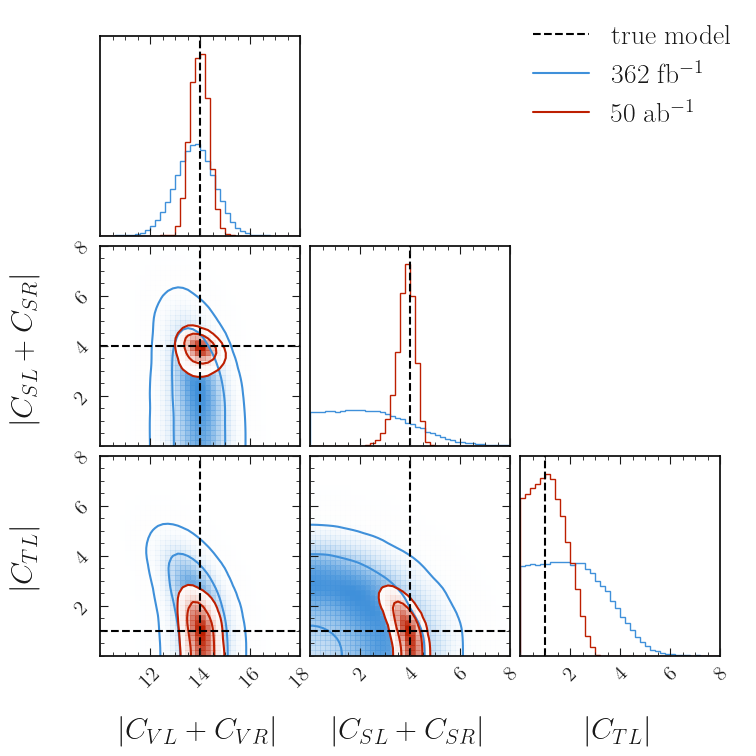

In [18]:
cv = r'$|C_{VL} + C_{VR}|$'
cs = r'$|C_{SL} + C_{SR}|$'
ct = r'$|C_{TL}|$'
labels = [cv, cs, ct]

file = '../results/knunu_samples.pdf'

fig = corner.corner(post_data_small.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=40, 
                    levels=(0.68, 0.95), 
                    range = [(10., 18), (0,8), (0,8)],
                    smooth=1.5,
                    labels=labels,
                    color='C0',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    );

fig = corner.corner(post_data_large.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=40, 
                    levels=(0.68, 0.95), 
                    range = [(10., 18), (0,8), (0,8)],
                    smooth=1.0,
                    labels=labels,
                    color='C2',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    fig=fig
                    );

truewcs = [14, 4, 1]
corner.overplot_lines(fig, truewcs, color='k', label='true model', linestyle='--')
# corner.overplot_points(fig, truewcs[None], marker="s", color="C2")

fig.legend(
        handles = fig.axes[0].get_legend_handles_labels()[0] + [
            mlines.Line2D([], [], color='C0', label=r'362 fb$^{-1}$'),
            mlines.Line2D([], [], color='C2', label=r'50 ab$^{-1}$'),
        ],
        fontsize=20, loc="upper right"
    )

plt.savefig(file)
plt.show()


In [19]:
results = az.summary(post_data_large, var_names=['cvl', 'csl', 'ctl'], hdi_prob=0.95).T
results

,cvl[0],csl[0],ctl[0]
mean,13.970,3.821,1.130
sd,0.360,0.366,0.683
hdi_2.5%,13.271,3.068,0.000
hdi_97.5%,14.660,4.495,2.319
mcse_mean,0.019,0.015,0.029
mcse_sd,0.014,0.011,0.023
ess_bulk,356.000,614.000,558.000
ess_tail,884.000,1254.000,482.000
r_hat,1.020,1.020,1.020


## Compare to simple reweighting


In [20]:
post_data_large = az.from_json(   '../samples_multiply/knunu_large_post_data.json')
post_data_large_1b = az.from_json('../samples_multiply/knunu_large_1b_post_data.json')

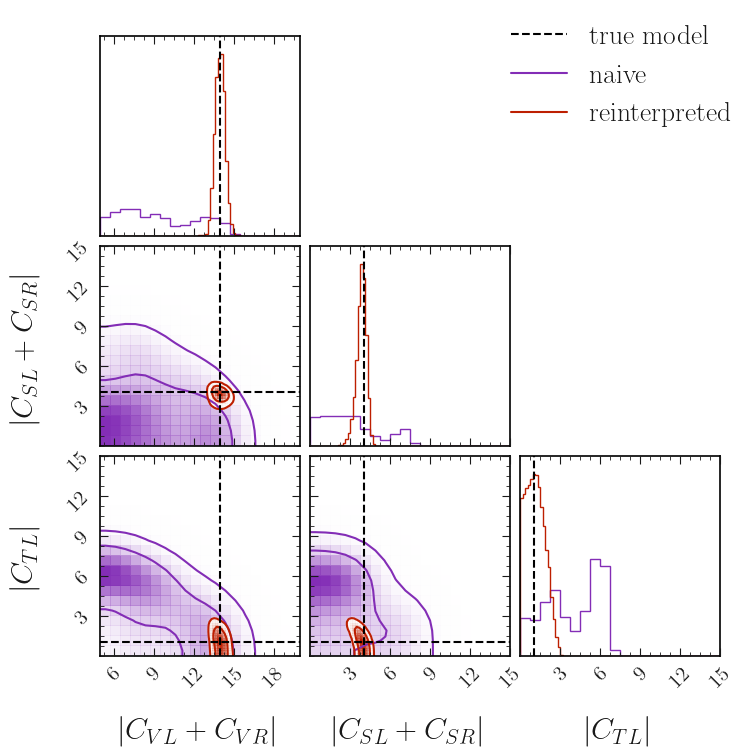

In [21]:
cv = r'$|C_{VL} + C_{VR}|$'
cs = r'$|C_{SL} + C_{SR}|$'
ct = r'$|C_{TL}|$'
labels = [cv, cs, ct]

file = '../results/knunu_samples_compare.pdf'

fig = corner.corner(post_data_large_1b.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=20, 
                    levels=(0.68, 0.95), 
                    range = [(5., 20.), (0,15), (0,15)],
                    smooth=2.1,
                    labels=labels,
                    color='C4',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    );

fig = corner.corner(post_data_large.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=80, 
                    levels=(0.68, 0.95), 
                    range = [(5., 20.), (0,15), (0,15)],
                    smooth=1.0,
                    labels=labels,
                    color='C2',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    fig=fig
                    );

corner.overplot_lines(fig, truewcs, color='k', label='true model', linestyle='--')

fig.legend(
        handles = fig.axes[0].get_legend_handles_labels()[0] + [
            mlines.Line2D([], [], color='C4', label='naive'),
            mlines.Line2D([], [], color='C2', label='reinterpreted'),
        ],
        fontsize=20, loc="upper right"
    )

plt.savefig(file)
plt.show()
